In [ ]:
#PRIMERO: Se leen las carpetas de los paises, la hidrografia y las ciudades que estan dentro de la carpeta mapas

In [ ]:
#!pip install geopandas

In [ ]:
#!pip install fiona

In [1]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [2]:
#SEGUNDO: Se llama al GeoDataFrame contries para hacer uso de la libreria pandas

In [3]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [4]:
#TERCERO: Se elige un pais, en este caso: Alemania

In [5]:
alemania=countries[countries.COUNTRY=='Germany']

In [6]:
#CUARTO: Se plotea el mapa de Alemania y se configura el estilo de la imagen

In [7]:
    # Antes de plotear el mapa se verifica que posean el mismo sistema de proyeccion CRS

In [8]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
cities=cities.to_crs(countries.crs)
rivers=rivers.to_crs(countries.crs)

In [10]:
    #Ahora si se muestra a Alemania

<Axes: >

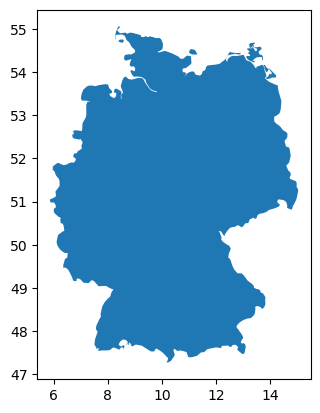

In [11]:
alemania.plot() 

In [12]:
#QUINTO: Se muestra el numero y nombre de las ciudades en Alemania

In [13]:
cities=cities.to_crs(countries.crs)

In [14]:
cities_alemania=cities[cities.COUNTRY=='Germany']
cities_alemania.shape


(12, 4)

In [15]:
cities_alemania.head()

NAME  COUNTRY CAPITAL                   geometry
18   Hamburg  Germany       N  POINT (10.02761 53.57112)
23    Bremen  Germany       N   POINT (8.85763 53.08010)
24    Berlin  Germany       Y  POINT (13.32757 52.51627)
31  Dortmund  Germany       N   POINT (7.46642 51.51381)
32  Duisburg  Germany       N   POINT (6.77530 51.48934)

In [16]:
#SEXTO: Se plotean las ciudades de Alemania

<Axes: >

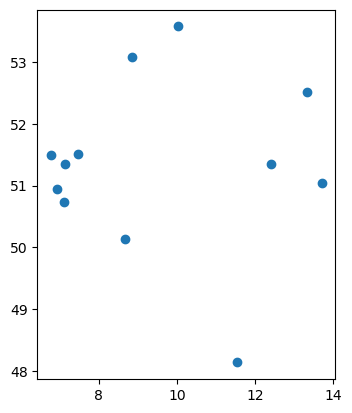

In [17]:
cities_alemania=cities[cities.COUNTRY=='Germany']
cities_alemania.plot()

In [18]:
#SETIMO: Se muestra el numero y nombres de los rios de Alemania

In [19]:
rivers_alemania = gpd.clip(gdf=rivers,mask=alemania)
rivers_alemania.shape

(2, 3)

In [20]:
rivers_alemania.head()

NAME SYSTEM                                           geometry
14  Danube   None  MULTILINESTRING ((8.73734 47.99981, 9.56016 48...
61   Rhine   None  MULTILINESTRING ((6.42693 51.85182, 6.88766 51...

In [21]:
#OCTAVO: Se plotean los rios de Alemania

<Axes: >

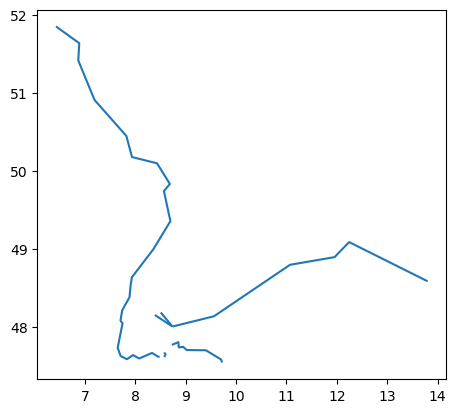

In [22]:
rivers_alemania = gpd.clip(gdf=rivers,mask=alemania)
rivers_alemania.plot()

In [23]:
#NOVENO: Se plotean las 3 capas anteriores en una sola figura

<Axes: >

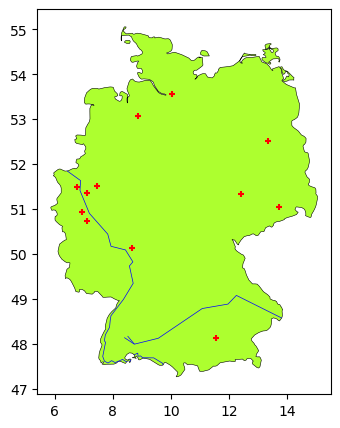

In [24]:
base = alemania.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_alemania.plot(marker='+', color='red', markersize=15,ax=base)
rivers_alemania.plot(edgecolor='blue', linewidth=0.5,ax=base)

In [25]:
#DECIMO: Se localiza el pais en el mapa mundia a traves de las cordenadas

In [26]:
    # Se establecen las cordenadas obtenidas del web: https://www.geodatos.net/en/coordinates:

In [27]:
alemaniaCoord=[51.165691, 10.451526]

In [28]:
m = cities_alemania.explore(location=alemaniaCoord,
                   zoom_start=5,#zoom
                   tiles='CartoDB positron',
                   color='red',
                   name="cities") 
m = rivers_alemania.explore(m=m, color="blue",
                   name="rivers")
m

In [29]:
    # Ahora veamos el mismo mapa de manera interactiva utilizando capas

In [30]:
import folium
m = cities_alemania.explore(location=alemaniaCoord,
                   zoom_start=5,#zoom
                   tiles='CartoDB positron',
                   color='red',
                   name="cities") 
m = rivers_alemania.explore(m=m, color="blue",
                   name="rivers")
folium.LayerControl().add_to(m)
m

In [ ]:
#ONCEAVO: Se reproyecta el CRS para obtener cordenadas, se usa este link: https://epsg.io/?q=Germany